In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wine_data_preference.csv', encoding = 'cp949')
df.head()

,seq,gender,age,job,marital,province,city,choice
0,1.0,MALE,50대,중소기업직원,MARREID,부산시,해운대구,A
1,2.0,FEMALE,30대,연구원,SINGLE,경상도,하동군,D
2,3.0,FEMALE,30대,자영업,MARREID,부산시,사하구,B
3,4.0,FEMALE,40대,자영업,MARREID,부산시,사하구,D
4,5.0,FEMALE,40대,의사,MARREID,서울시,강남구,C


In [4]:
df.drop(['seq', 'province', 'city'], axis = 1, inplace = True)


In [8]:
df = df.dropna()
df = df[(df['gender'] == 'MALE') | (df['gender'] == 'FEMALE')]

In [9]:
qq_dict = {'MALE':1, 'FEMALE':0}
graph = list(map((lambda x: qq_dict[x]), df['gender'].to_list()))
graph[:10]



[1, 0, 0, 0, 0, 1, 1, 0, 1, 0]

In [15]:
choice = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H']
male_result = list()
female_result = list()
for letter in choice:
    male_result.append(len(df[(df['choice'] == letter) & (df['gender'] == 'MALE')]))
    female_result.append(len(df[(df['choice'] == letter) & (df['gender'] != 'MALE')]))

([<matplotlib.patches.Wedge at 0x7f98692480f0>,
 [Text(0.9869867298335319, 0.48565131023452524, 'A'),
  Text(0.35083895816451216, 1.0425507303887136, 'B'),
  Text(-0.18114317799059945, 1.0849825570337368, 'C'),
  Text(-0.6833432814450046, 0.8619988165328148, 'D'),
  Text(-1.0931587351669483, 0.12249073323397848, 'E'),
  Text(-0.7553512734734773, -0.7996527081564824, 'F'),
  Text(0.1480454382807251, -1.089991994559716, 'G'),
  Text(0.9581581616598682, -0.5403081872825748, 'H')])

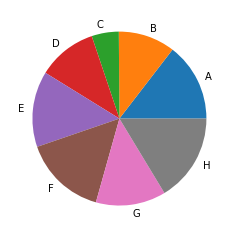

In [19]:
plt.pie(male_result, labels=choice)

([<matplotlib.patches.Wedge at 0x7f986b0ccdd8>,
 [Text(1.0919093412036043, 0.13316903015457948, 'A'),
  Text(0.7736844510475019, 0.7819286221947153, 'B'),
  Text(-0.29706929222668044, 1.0591269213913597, 'C'),
  Text(-1.099036088305703, 0.04603994571781145, 'D'),
  Text(-0.33836593496923023, -1.046665416478637, 'E'),
  Text(0.4236432131599307, -1.0151484758120506, 'F'),
  Text(0.8017537673825874, -0.7531207715153181, 'G'),
  Text(1.067052093438437, -0.26720746600469325, 'H')])

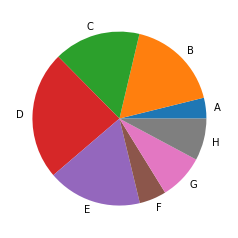

In [20]:
plt.pie(female_result, labels=choice)

In [24]:
da = df[df['choice'] == 'A']
da['choice'] = 1
delse = df[df['choice'] != 'A']
print(len(da), len(delse))

815 9139


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
delse = delse[:815]

In [ ]:
delse['choice'] = 0
da = pd.concat([da, delse])

In [25]:
dummy = pd.get_dummies(df)
dummy.corr()

,gender_FEMALE,gender_MALE,age_20대,age_30대,age_40대,age_50대,age_60대 이상,age_미상,job_공무원,job_교수,...,marital_SINGLE,marital_UNKNOWN,choice_A,choice_B,choice_C,choice_D,choice_E,choice_F,choice_G,choice_H
gender_FEMALE,1.000000,-1.000000,-0.004636,0.003716,-0.007983,0.009247,-0.004719,0.011899,0.001698,-0.008585,...,-0.013119,0.001462,-0.191398,0.095558,0.169221,0.161718,0.045731,-0.175612,-0.074920,-0.132481
gender_MALE,-1.000000,1.000000,0.004636,-0.003716,0.007983,-0.009247,0.004719,-0.011899,-0.001698,0.008585,...,0.013119,-0.001462,0.191398,-0.095558,-0.169221,-0.161718,-0.045731,0.175612,0.074920,0.132481
age_20대,-0.004636,0.004636,1.000000,-0.282826,-0.316829,-0.286170,-0.047199,-0.012068,-0.051646,-0.067957,...,0.013442,0.010342,-0.043984,0.249903,-0.070504,-0.072009,-0.048425,-0.043313,0.044690,-0.028124
age_30대,0.003716,-0.003716,-0.282826,1.000000,-0.371112,-0.335200,-0.055286,-0.014135,0.006670,0.025779,...,-0.001873,-0.007946,-0.072723,-0.044061,-0.083312,-0.130340,0.340951,-0.013812,-0.016137,-0.010993
age_40대,-0.007983,0.007983,-0.316829,-0.371112,1.000000,-0.375500,-0.061933,-0.015835,0.022948,0.016393,...,0.002539,0.001115,-0.064625,-0.107546,0.079317,0.062320,-0.150140,0.143946,0.022671,0.040344
age_50대,0.009247,-0.009247,-0.286170,-0.335200,-0.375500,1.000000,-0.055940,-0.014303,0.016986,0.018042,...,-0.011634,-0.001871,0.177434,-0.071530,0.061966,0.123402,-0.132223,-0.092855,-0.045367,-0.006511
age_60대 이상,-0.004719,0.004719,-0.047199,-0.055286,-0.061933,-0.055940,1.000000,-0.002359,-0.000816,0.006107,...,-0.004456,-0.003474,0.013664,-0.003994,0.011272,0.032515,-0.022023,-0.019648,-0.015078,-0.000829
age_미상,0.011899,-0.011899,-0.012068,-0.014135,-0.015835,-0.014303,-0.002359,1.000000,-0.008253,-0.005742,...,-0.007477,-0.000888,-0.007334,0.024541,-0.008907,-0.011769,-0.010768,-0.007823,0.005188,0.017147
job_공무원,0.001698,-0.001698,-0.051646,0.006670,0.022948,0.016986,-0.000816,-0.008253,1.000000,-0.078574,...,0.005637,-0.012152,-0.000844,0.013133,-0.062698,0.043005,0.001037,0.028710,-0.044520,0.011846
job_교수,-0.008585,0.008585,-0.067957,0.025779,0.016393,0.018042,0.006107,-0.005742,-0.078574,1.000000,...,-0.000462,-0.008456,0.030992,-0.044372,0.091932,-0.027171,0.021932,0.010129,-0.017814,-0.054629


In [26]:
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [27]:
df = df[(df['age'] != '미상') & (df['job'] != '미상') & (df['marital'] != 'UNKNOWN')]

In [28]:
len(df)

9930

In [29]:
df.head()

,gender,age,job,marital,choice
0,MALE,50대,중소기업직원,MARREID,A
1,FEMALE,30대,연구원,SINGLE,D
2,FEMALE,30대,자영업,MARREID,B
3,FEMALE,40대,자영업,MARREID,D
4,FEMALE,40대,의사,MARREID,C


In [32]:
log_model = Logit.from_formula('''C(choice) ~ C(gender) + C(marital) + C(age) + C(job) ''', df)
log_result = log_model.fit()
print(log_result.summary())

ValueError: operands could not be broadcast together with shapes (9930,8) (9930,) 

In [33]:
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [34]:
df_x = df.drop('choice', axis = 1, inplace = False)
df_y = df['choice']
df_x = pd.get_dummies(df_x)
df_x.describe()

,gender_FEMALE,gender_MALE,age_20대,age_30대,age_40대,age_50대,age_60대 이상,job_공무원,job_교수,job_기자,...,job_변호사,job_연구원,job_의사,job_임시직,job_자영업,job_중소기업직원,job_학생,job_회사직원,marital_MARREID,marital_SINGLE
count,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,...,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.000000,9930.00000,9930.000000,9930.000000,9930.000000
mean,0.595368,0.404632,0.194562,0.249245,0.293656,0.253374,0.009164,0.101712,0.051964,0.046425,...,0.048137,0.052367,0.051057,0.135247,0.171803,0.098590,0.04139,0.097784,0.692246,0.307754
std,0.490845,0.490845,0.395883,0.432598,0.455459,0.434965,0.095295,0.302284,0.221965,0.210414,...,0.214066,0.222776,0.220126,0.342004,0.377228,0.298126,0.19920,0.297038,0.461588,0.461588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
df_x.columns

In [35]:
pca = PCA(n_components=len(df_x.columns))
nd_pca = pca.fit_transform(df_x)
df_pca = pd.DataFrame(nd_pca, columns = ['Prin' + str(x) for  x in range(len(df_x.columns))])

In [ ]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1, len(df_x.columns)+1)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat